<a href="https://colab.research.google.com/github/imanf18/miniproject1/blob/main/KNNK_CPC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
data shape :  (300, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   powLv1  300 non-null    float64
 1   powLv2  300 non-null    float64
 2   powLv3  300 non-null    float64
 3   powLv4  300 non-null    float64
 4   powLv5  300 non-null    float64
 5   kelas   300 non-null    object 
dtypes: float64(5), object(1)
memory usage: 14.2+ KB
X :  (300, 5)
y :  (300,)
x_train : (225, 5)
y_train : (225,)
x_test : (75, 5)
y_test : (75,)
              precision    recall  f1-score   support

           A       0.66      0.70      0.68        27
           D       0.75      0.78      0.77        23
           E       0.73      0.64      0.68        25

    accuracy                           0.71        75
   macro avg       0.71      

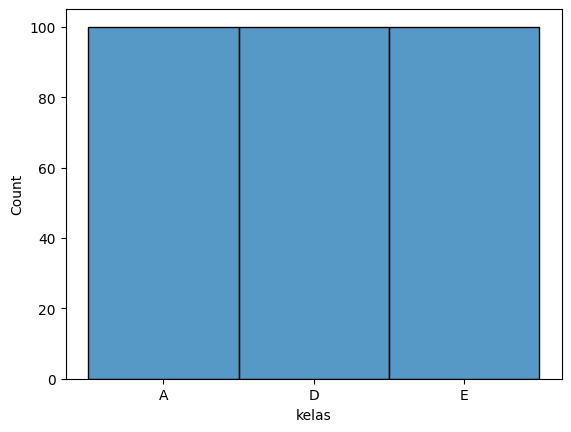

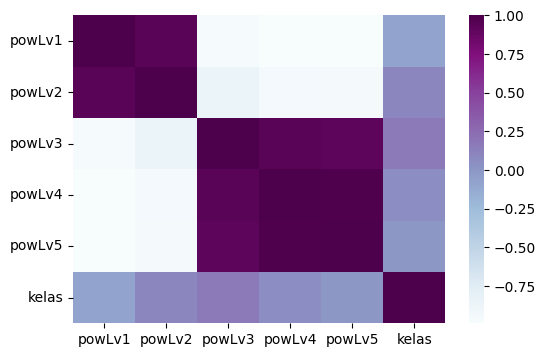

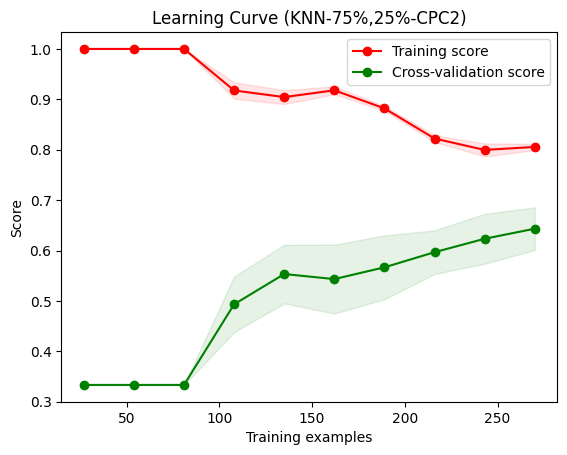

[0.6]
[0.6, 0.65]
[0.6, 0.65, 0.75]
[0.6, 0.65, 0.75, 0.7333333333333333]
[0.6, 0.65, 0.75, 0.7333333333333333, 0.6833333333333333]
[0.6, 0.65, 0.75, 0.7333333333333333, 0.6833333333333333, 0.6166666666666667]
[0.6, 0.65, 0.75, 0.7333333333333333, 0.6833333333333333, 0.6166666666666667, 0.6166666666666667]
[0.6, 0.65, 0.75, 0.7333333333333333, 0.6833333333333333, 0.6166666666666667, 0.6166666666666667, 0.6]
[0.6, 0.65, 0.75, 0.7333333333333333, 0.6833333333333333, 0.6166666666666667, 0.6166666666666667, 0.6, 0.6333333333333333]
[0.6, 0.65, 0.75, 0.7333333333333333, 0.6833333333333333, 0.6166666666666667, 0.6166666666666667, 0.6, 0.6333333333333333, 0.6]
[0.6, 0.65, 0.75, 0.7333333333333333, 0.6833333333333333, 0.6166666666666667, 0.6166666666666667, 0.6, 0.6333333333333333, 0.6, 0.6333333333333333]
[0.6, 0.65, 0.75, 0.7333333333333333, 0.6833333333333333, 0.6166666666666667, 0.6166666666666667, 0.6, 0.6333333333333333, 0.6, 0.6333333333333333, 0.6333333333333333]
[0.6, 0.65, 0.75, 0.73

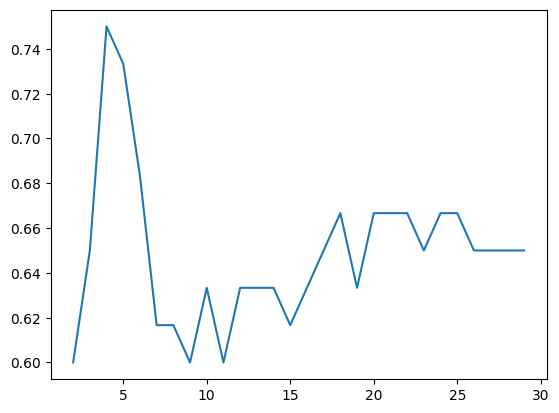

Hasil Prediksi Kelas Baru
['E']


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
drive.mount ('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/CPC2.xlsx')  #Membaca File CPxx.xlsx dari MyDrive pada Google Drive
df

"""## 1. Data Understanding"""

print("data shape : ", df.shape) #Melihat Jumlah total kolom dan baris pada file

df.info() #Melihat tipe data tiap kolom

df.describe() #Melihat atribut data tiap kolom

df.kelas.value_counts() #Melihat jumlah total distribusi data klasifikasi dalam kolom kelas

sns.histplot(df['kelas'])

"""## 2. Cleaning Data"""

df.isnull().sum() # memeriksa Apakah ada data yang tidak mempunyai Nilai, jika menghasilkan 0 artinya data tersisi semua (bagus)

df.duplicated().sum() # memeriksa Apakah ada data yang duplikat, jika menghasilkan 0 artinya data tidak ada yang duplikat (bagus)

"""## 3. Exploratory Data Analysis (EDA)"""

label_encoder = LabelEncoder() # Mengkonversi kolom yang mempunyai tipe data object

df['kelas'] = label_encoder.fit_transform(df['kelas']) # Mengkonversi kolom kelas
df.corr() #Menampilkan Korelasi antar data

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap='BuPu') #Memvisualisasikan data korelasi dalam heatmap

"""## 4. Data Preparation"""

df = pd.read_excel('/content/drive/MyDrive/CPC2.xlsx') #INI HARUS DISESUAIKAN !!!!!
df.head()

X = df.drop(columns = ['kelas'])
y = df['kelas']

print("X : ", X.shape)
print("y : ", y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)# 75% Training, 25 % Testing

print(f"x_train : {x_train.shape}")
print(f"y_train : {y_train.shape}")
print(f"x_test : {x_test.shape}")
print(f"y_test : {y_test.shape}")

"""## 5. Modeling"""

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
KNN_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print('Akurasi KNN : {:.2f}%'.format(KNN_acc*100))

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

print("f1_score : ", f1)
print("sensitivity : ", sensitivity)
print("specificity : ", specificity)

# Perform 10-fold CV
scores = cross_val_score(knn, X, y, cv=10)
print("10-fold CV : ", scores)

# Print the accuracy for each fold
for i in range(len(scores)):
    print(f"Fold {i+1}: {scores[i]*100:.2f}%")

# Print the mean accuracy
print("Mean CV:", scores.mean())

# Calculate the learning curve
train_sizes, train_scores, valid_scores = learning_curve(knn, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=10)

# Calculate the mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title('Learning Curve (KNN-75%,25%-CPC2)') #INI HARUS DISESUAIKAN !!!!!
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

"""#Mencari K Terbaik"""

#Mencari K Terbaik
#x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
K= np.arange(2,30)
akurasi = []
for k in K:
  m2 = KNeighborsClassifier(n_neighbors=k)
  m2.fit(x_train, y_train)
  y_pred = m2.predict(x_test)
  acc1 = accuracy_score(y_pred, y_test)
  akurasi.append(acc1)
  print(akurasi)

plt.plot(K,akurasi)
plt.show()

"""## 6. Testing"""

testing = {'powLv1': [0.446266],
        'powLv2': [0.220902],
        'powLv3': [0.144428],
        'powLv4': [0.105523],
        'powLv5': [0.082881]}

testing = pd.DataFrame(testing)
testing

pred_coba = knn.predict(testing)
print("Hasil Prediksi Kelas Baru")
print(pred_coba)